In [1]:
import loompy
import glob
import velocyto as vcy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint

Load data

In [2]:
vlm = vcy.load_velocyto_hdf5('/projects/pytrik/sc_adipose/analyze_10x_fluidigm/data/velocyto/180831_tsne33_velocity.hdf5')

In [3]:
print(vlm.S.sum(0))
vlm.S.sum(0).mean()

[5146 3233 3031 ...,  991  725  724]


2017.2450225149789

In [4]:
vlm.ca['CellID'] = [x.decode('utf8') for x in vlm.ca['CellID']]
vlm.ca['timepoint'] = [x.decode('utf8') for x in vlm.ca['timepoint']]

In [5]:
vlm.set_clusters(vlm.ca['timepoint'])

Spliced, unspliced and ambiguous fractions per sample. 

In [ ]:
vlm.plot_fractions()

In [5]:
timepoint_colors = {"T1": np.array([246,119,112]), "T2": np.array([163,164,32]), "T3": np.array([29,190,127]), "T4": np.array([30,177,243]), "T5": np.array([229,112,240])}
timepoint_colors = {k:v/256 for k, v in timepoint_colors.items()}

res05_colors = {0: np.array([246,119,112]), 1: np.array([220,139,33]), 10: np.array([182,158,33]), 11: np.array([125,172,32]), 2: np.array([27,184,64]), 3: np.array([29,191,140]), 4: np.array([31,191,195]), 5: np.array([30,181,237]), 6: np.array([123,172,252]), 7: np.array([198,128,252]), 8: np.array([243,105,225]), 9: np.array([253,103,176])}
res05_colors = {k:v/256 for k, v in res05_colors.items()}

vlm.set_clusters(vlm.ca['timepoint'], cluster_colors_dict=timepoint_colors)

In [6]:
state_colors = {1: np.array([246,119,112]), 2: np.array([27,184,64]), 3: np.array([100,158,252,])}
state_colors = {k:v/256 for k, v in state_colors.items()}

Some PCA plots. The colors represent different samples. 

Text(0,0.5,'PC5')

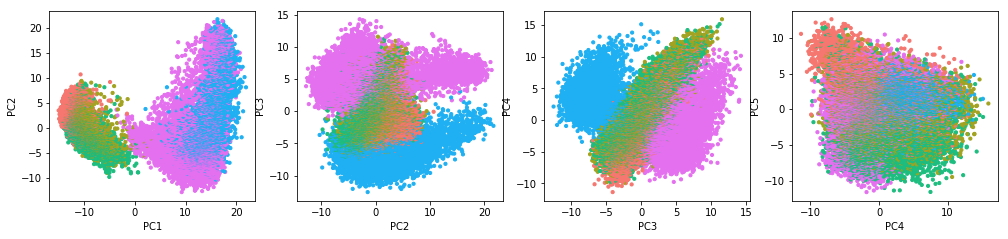

In [9]:
plt.figure(None, (17,3.5))
plt.subplot(141)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,1], s=10, c=vlm.colorandum)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.subplot(142)
vcy.scatter_viz(vlm.pcs[:,1], vlm.pcs[:,2], s=10, c=vlm.colorandum)
plt.xlabel("PC2"); plt.ylabel("PC3")
plt.subplot(143)
vcy.scatter_viz(vlm.pcs[:,2], vlm.pcs[:,3], s=10, c=vlm.colorandum)
plt.xlabel("PC3"); plt.ylabel("PC4")
plt.subplot(144)
vcy.scatter_viz(vlm.pcs[:,3], vlm.pcs[:,4],s=10, c=vlm.colorandum)
plt.xlabel("PC4"); plt.ylabel("PC5")

<h3>TSNE plots and velocity projection</h3>

In [9]:
print(vlm.colorandum)


[[ 0.9609375   0.46484375  0.4375    ]
 [ 0.9609375   0.46484375  0.4375    ]
 [ 0.9609375   0.46484375  0.4375    ]
 ..., 
 [ 0.1171875   0.69140625  0.94921875]
 [ 0.1171875   0.69140625  0.94921875]
 [ 0.1171875   0.69140625  0.94921875]]


(0.80000000000000004, 2.0, -1.0, 8.0)

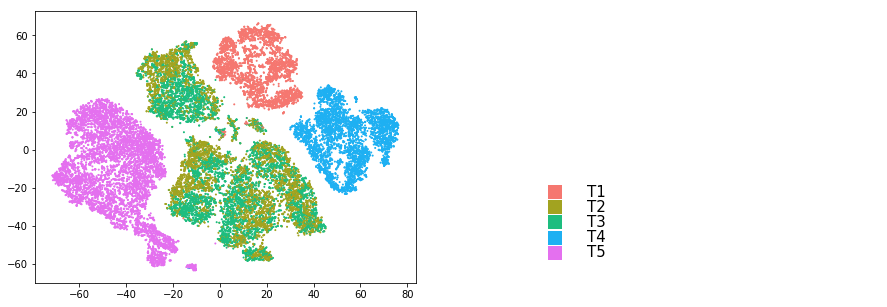

In [10]:
vlm.set_clusters(vlm.ca['timepoint'], cluster_colors_dict=timepoint_colors)

plt.figure(figsize=(15,5))

plt.subplot(121)
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum, s=1)

colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['timepoint'][i]] = vlm.colorandum[i]

plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis("off")

(0.80000000000000004, 2.0, -1.0, 8.0)

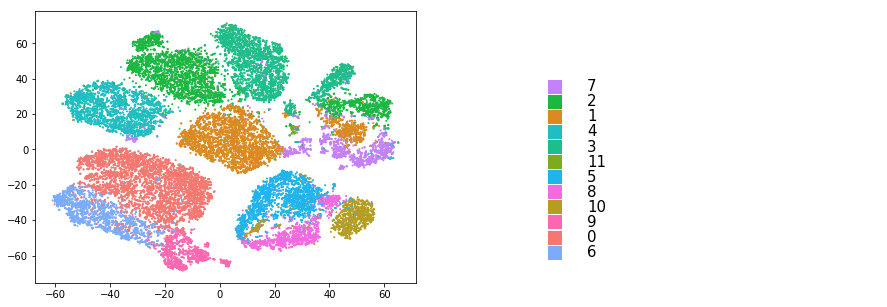

In [25]:
vlm.set_clusters(vlm.ca['res.0.5'], cluster_colors_dict=res05_colors)

plt.figure(figsize=(15,5))

plt.subplot(121)
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum, s=1)

colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['res.0.5'][i]] = vlm.colorandum[i]

plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)

plt.axis("off")

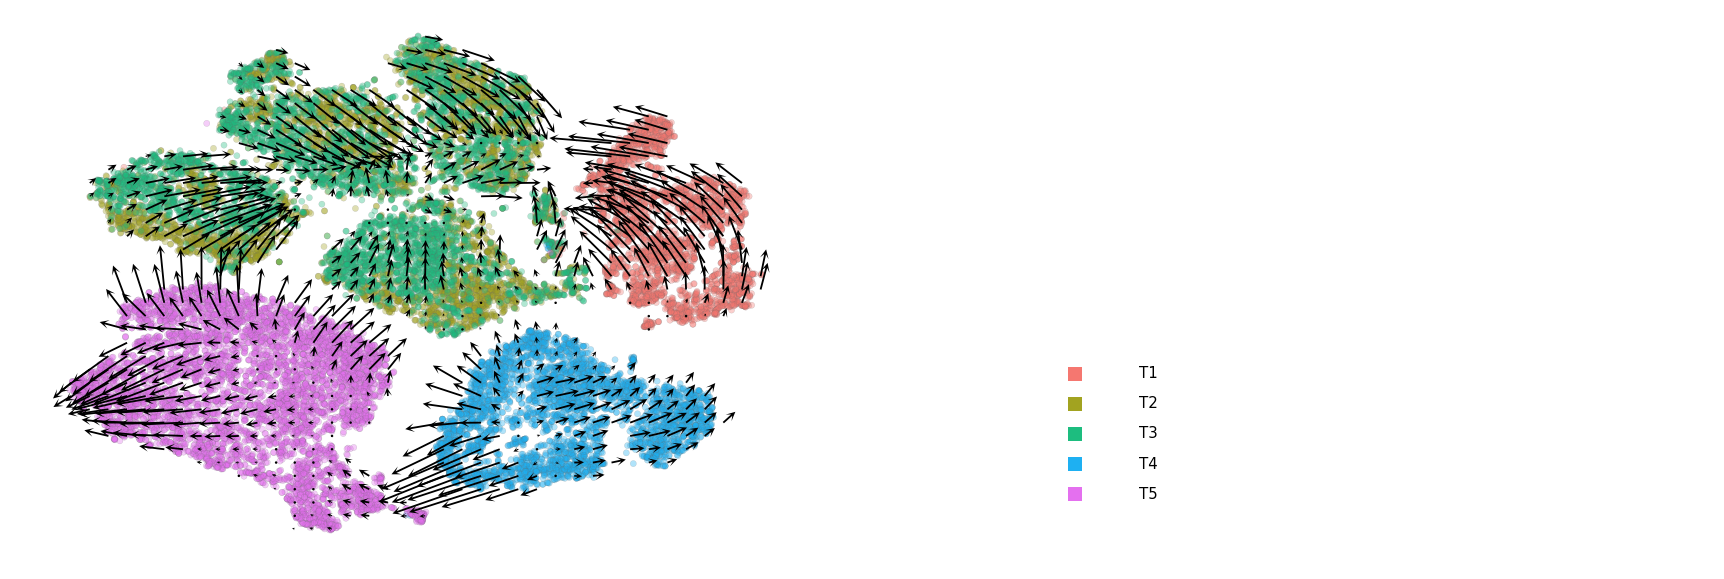

In [21]:
vlm.set_clusters(vlm.ca['timepoint'], timepoint_colors)
plt.figure(None,(30,10))
plt.subplot(121)
vlm.plot_grid_arrows(quiver_scale=3,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")


colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['timepoint'][i]] = vlm.colorandum[i]

plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis('off')
plt.savefig('/projects/pytrik/sc_adipose/analyze_10x_fluidigm/data/plots_slides/velocyto.pdf', bbox_inches='tight', pad_inches=0)

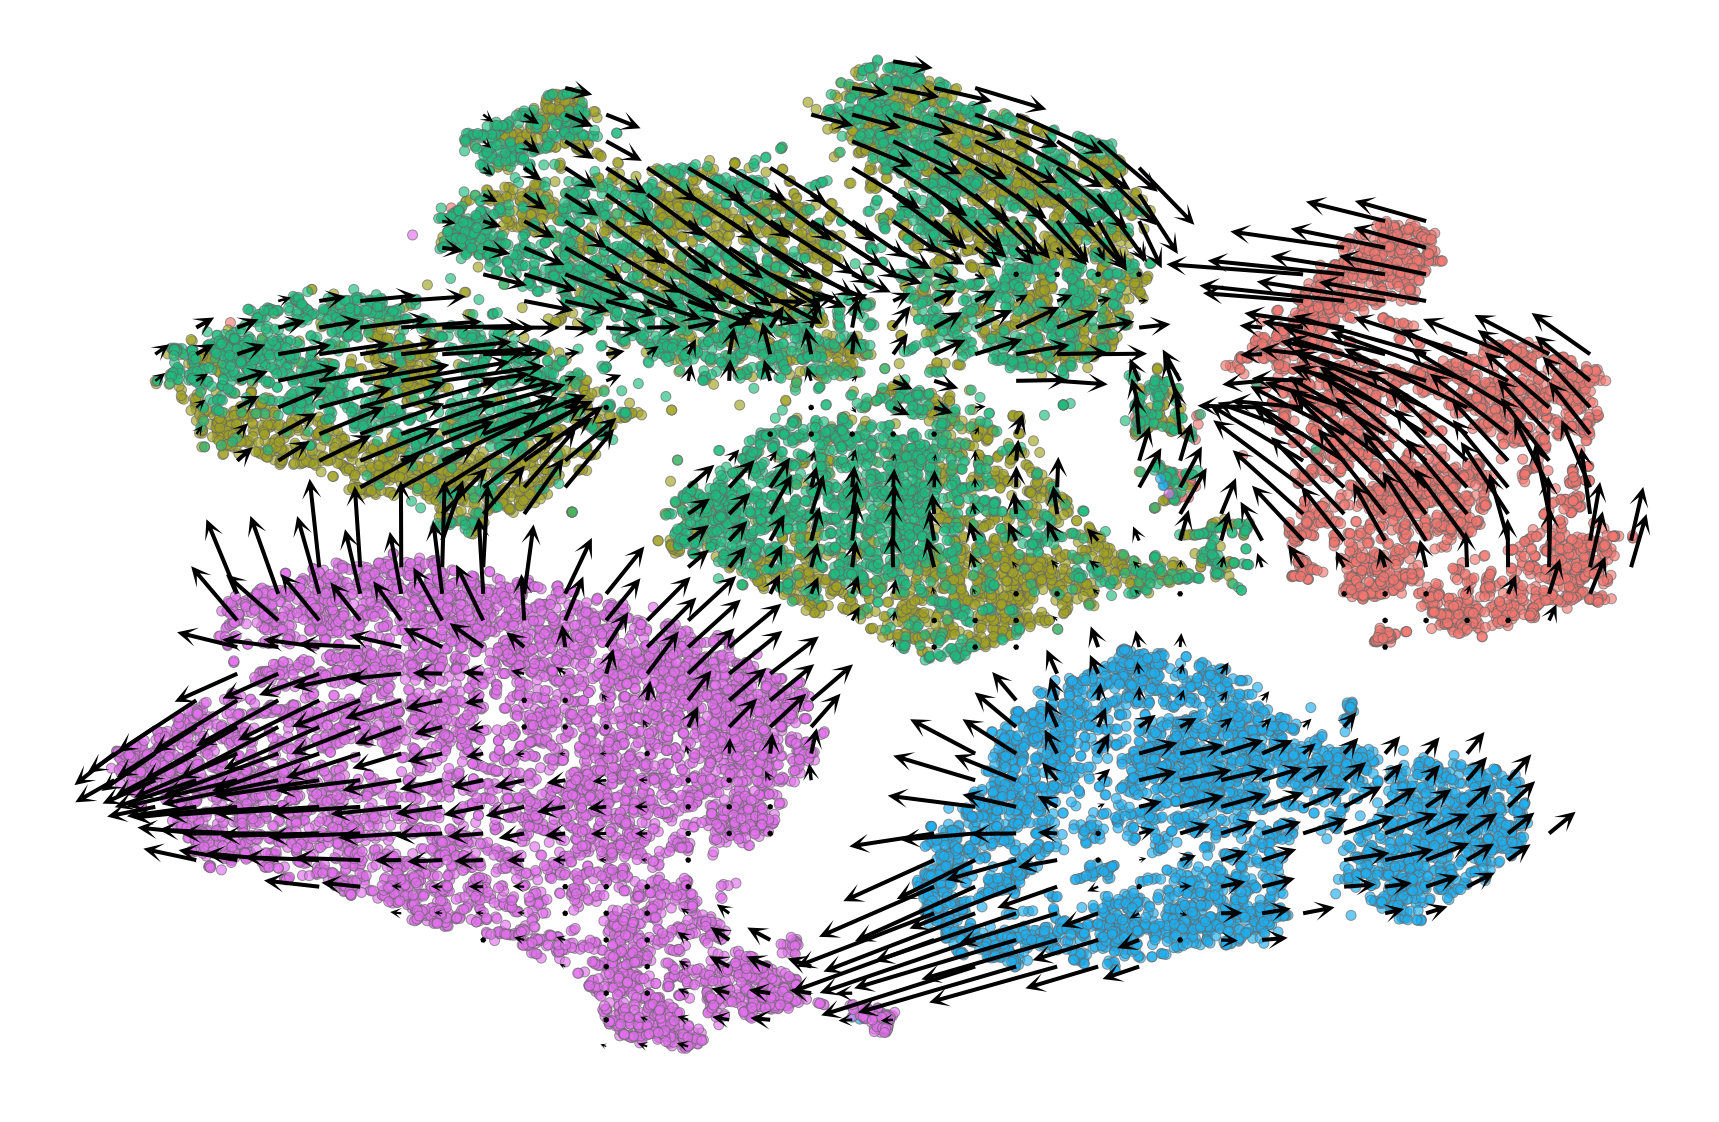

In [10]:
vlm.set_clusters(vlm.ca['timepoint'], timepoint_colors)
plt.figure(None,(45,30))
vlm.plot_grid_arrows(quiver_scale=3.0,
                    scatter_kwargs_dict={"alpha":0.35, "lw":2, "edgecolor":"0.4", "s":300, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")
plt.savefig('/projects/pytrik/sc_adipose/analyze_10x_fluidigm/data/plots_slides/velocyto.pdf', bbox_inches='tight', pad_inches=0)

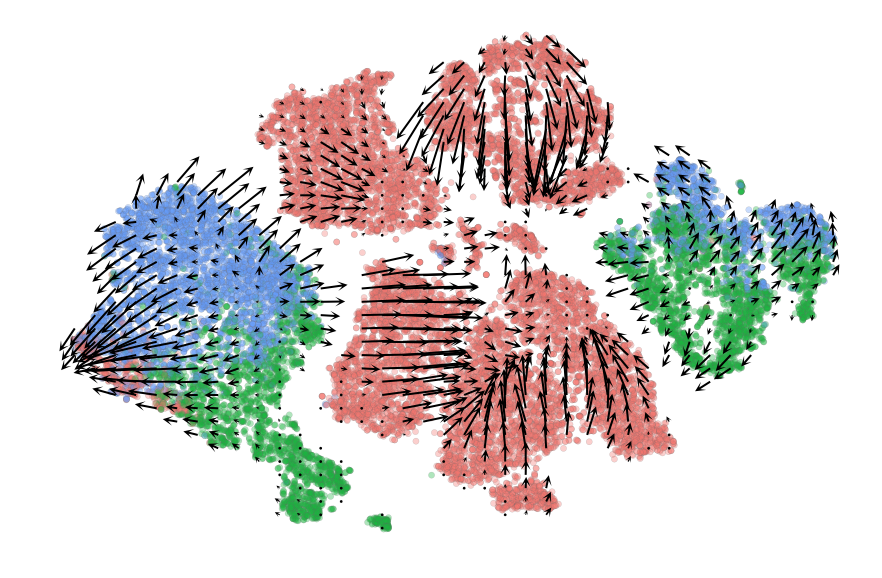

In [13]:
#vlm.set_clusters(vlm.ca['res.0.5'], res05_colors)
vlm.set_clusters(vlm.ca['State'], state_colors)
plt.figure(None,(15,10))
vlm.plot_grid_arrows(quiver_scale=3,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")


(0.80000000000000004, 2.0, -1.0, 8.0)

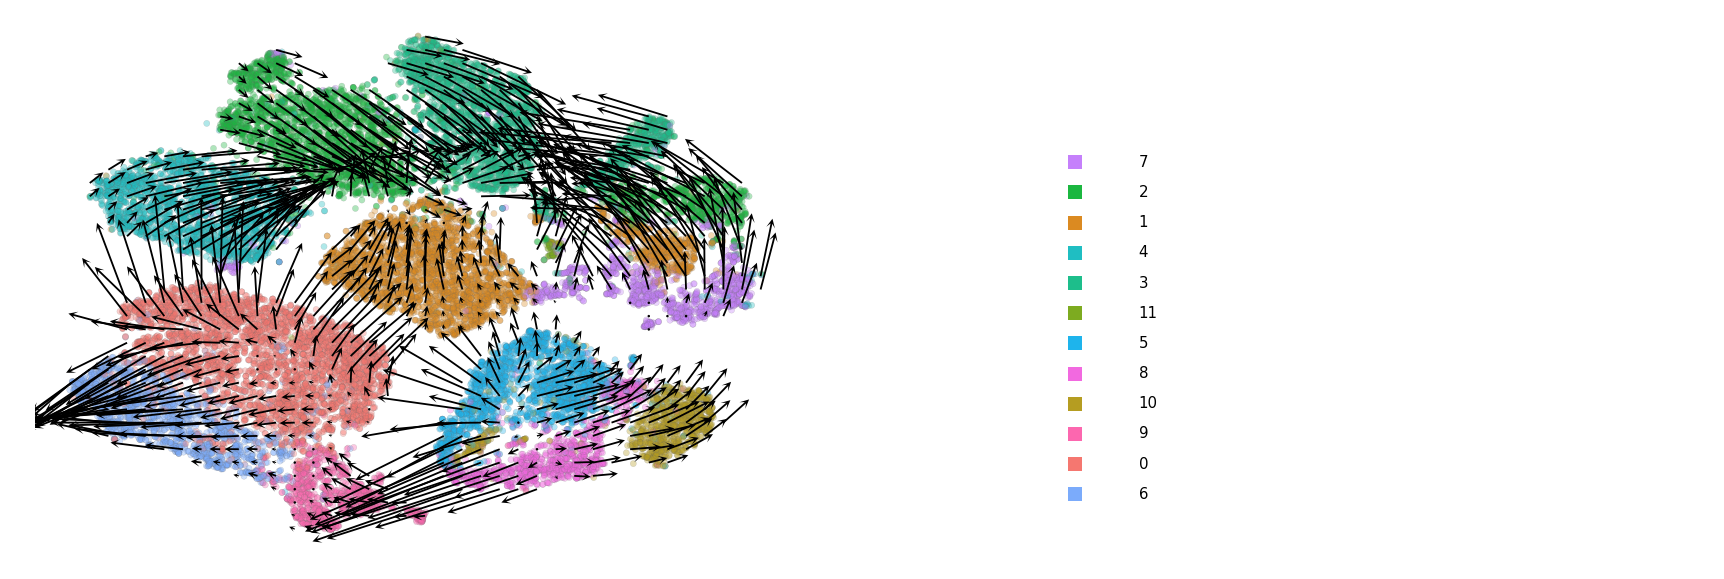

In [29]:
vlm.set_clusters(vlm.ca['res.0.5'], res05_colors)
plt.figure(None,(30,10))
plt.subplot(121)
vlm.plot_grid_arrows(quiver_scale=1.4,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")


colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['res.0.5'][i]] = vlm.colorandum[i]

plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis('off')

(0.80000000000000004, 2.0, -1.0, 8.0)

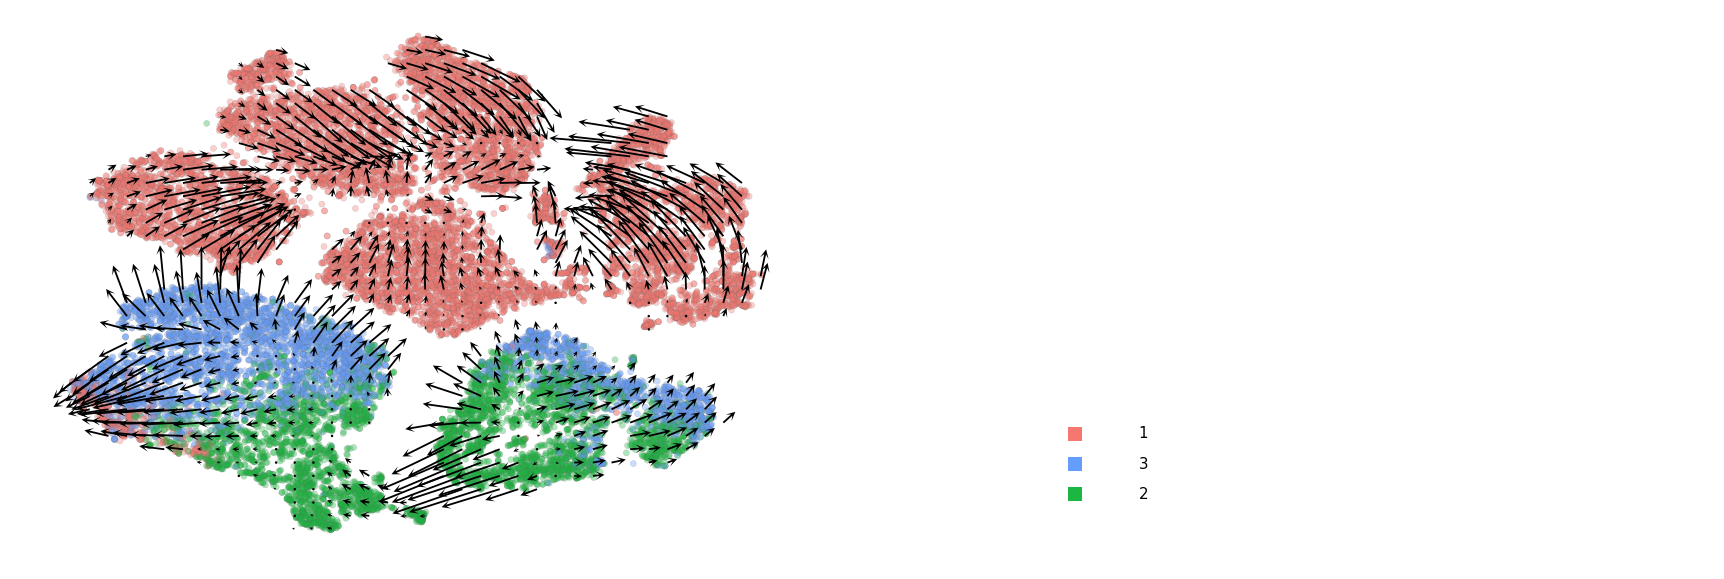

In [35]:
vlm.set_clusters(vlm.ca['State'], state_colors)
plt.figure(None,(30,10))
plt.subplot(121)
vlm.plot_grid_arrows(quiver_scale=3,
                    scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=5.5, angles='xy', scale_units='xy',
                    headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                    plot_random=False, scale_type="relative")


colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['State'][i]] = vlm.colorandum[i]

plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis('off')

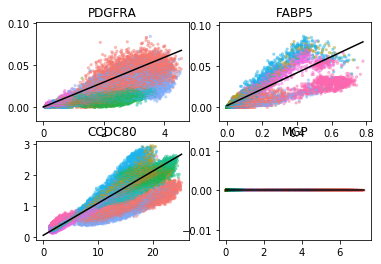

In [15]:
vlm.set_clusters(vlm.ca['timepoint'], timepoint_colors)
vlm.plot_phase_portraits(["PDGFRA", "FABP5", "CCDC80", "MGP"])

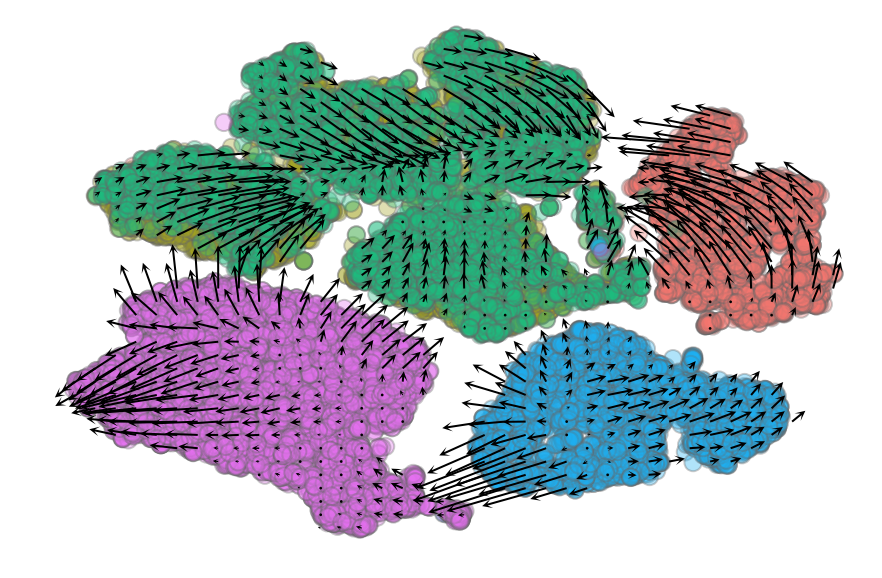

In [11]:
vlm.set_clusters(vlm.ca['timepoint'], timepoint_colors)

colors_dict = {}
for i in range(len(vlm.colorandum)):
    colors_dict[vlm.ca['State'][i]] = vlm.colorandum[i]
    
plt.figure(None,(15,10))
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis('off')

plt.savefig('/projects/pytrik/sc_adipose/analyze_10x_fluidigm/data/plots_slides/velocyto_legend_timepoint.pdf', bbox_inches='tight', pad_inches=0)